# Case Study: Implementing Generative Adversarial Networks (GANs) with TensorFlow and Keras on Airplane Data

## Problem Statement
The objective is to generate synthetic images of airplanes using **Generative Adversarial Networks (GANs)**. This method is particularly useful for generating new data samples for training deep learning models when the dataset is limited.

---

## Dataset
We will use the **CIFAR-10 dataset** which consists of 60,000 32x32 color images across 10 classes. Our focus will be:
- Extracting only the **airplane class** (label 0).
- Normalizing the images to improve the performance of the GAN.
- Using 80% of the airplane images for training and 20% for validation.

---

## Generative Adversarial Networks (GANs)
A **GAN** consists of two networks:
1. **Generator**: Generates fake images from random noise.
2. **Discriminator**: Classifies images as real or fake.

### Key Objectives:
- The generator tries to fool the discriminator by producing images that resemble the real data.
- The discriminator tries to distinguish between real and fake images.
- The training process is adversarial, with both networks improving over time.

---

## Implementation

### Step 1: Import Libraries

In [1]:
!pip install --upgrade pyopenssl cryptography

  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
   ---------------------------------------- 0.0/3.5 MB ? eta -:--:--
   ---------------------------------------- 3.5/3.5 MB 20.8 MB/s  0:00:00
Using cached typing_extensions-4.15.0-py3-none-any.whl (44 kB)

   -------- ------------------------------- 1/5 [pycparser]
   -------- ------------------------------- 1/5 [pycparser]
   ---------------- ----------------------- 2/5 [cffi]
   ---------------- ----------------------- 2/5 [cffi]
   ------------------------ --------------- 3/5 [cryptography]
   ------------------------ --------------- 3/5 [cryptography]
   ------------------------ --------------- 3/5 [cryptography]
   ------------------------ --------------- 3/5 [cryptography]
   ------------------------ --------------- 3/5 [cryptography]
   ------------------------ --------------- 3/5 [cryptography]
   -------------------------------- ------- 4/5 [pyopenssl]
   ---------------------------------------- 5/5 [p

In [1]:
# Import necessary libraries
# Install required packages
!pip install --quiet --upgrade pip
!pip install --quiet tensorflow numpy matplotlib

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

c:\Users\saakh\Learning\AI_ML\nlp\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


### Step 2: Load and Preprocess the CIFAR-10 Dataset

In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Filter only the airplane class (label 0)
airplane_train = x_train[y_train.flatten() == 0]
airplane_test = x_test[y_test.flatten() == 0]

# Normalize the pixel values to [0, 1]
airplane_train = airplane_train.astype('float32') / 255.0
airplane_test = airplane_test.astype('float32') / 255.0

# Combine train and test sets, then split into training and validation sets
airplane_data = np.concatenate([airplane_train, airplane_test], axis=0)
x_train, x_val = np.split(airplane_data, [int(0.8 * len(airplane_data))])


c:\Users\saakh\Learning\AI_ML\nlp\.venv\Lib\site-packages\keras\src\datasets\cifar.py:18: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  d = cPickle.load(f, encoding="bytes")


### Step 3: Define the GAN Components

In [3]:
latent_dim = 100  # Dimensionality of the latent space (input noise)

# Generator Model
def build_generator(latent_dim):
    model = keras.Sequential([
        layers.Dense(8 * 8 * 128, activation='relu', input_shape=(latent_dim,)),
        layers.Reshape((8, 8, 128)),
        layers.Conv2DTranspose(128, 4, strides=2, padding='same', activation='relu'),
        layers.Conv2DTranspose(64, 4, strides=2, padding='same', activation='relu'),
        layers.Conv2DTranspose(3, 3, padding='same', activation='sigmoid')
    ])
    return model

generator = build_generator(latent_dim)
generator.summary()

# Discriminator Model
def build_discriminator():
    model = keras.Sequential([
        layers.Conv2D(64, 3, strides=2, padding='same', input_shape=(32, 32, 3)),
        layers.LeakyReLU(0.2),
        layers.Conv2D(128, 3, strides=2, padding='same'),
        layers.LeakyReLU(0.2),
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

discriminator = build_discriminator()
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
discriminator.summary()


c:\Users\saakh\Learning\AI_ML\nlp\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8192)           │       827,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 16, 16, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 32, 32, 64)     │       131,136 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 32, 32, 3)      │         1,731 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,222,531 (4.66 MB)

 Trainable params: 1,222,531 (4.66 MB)

 Non-trainable params: 0 (0.00 B)

c:\Users\saakh\Learning\AI_ML\nlp\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 16, 16, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         8,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,841 (327.50 KB)

 Trainable params: 83,841 (327.50 KB)

 Non-trainable params: 0 (0.00 B)

### Step 4: Define the GAN Model

In [4]:
def build_gan(generator, discriminator):
    discriminator.trainable = False
    gan_input = keras.Input(shape=(latent_dim,))
    generated_image = generator(gan_input)
    gan_output = discriminator(generated_image)
    gan = keras.Model(gan_input, gan_output)
    gan.compile(optimizer='adam', loss='binary_crossentropy')
    return gan

gan = build_gan(generator, discriminator)
gan.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 32, 32, 3)      │     1,222,531 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 1)              │        83,841 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,306,372 (4.98 MB)

 Trainable params: 1,222,531 (4.66 MB)

 Non-trainable params: 83,841 (327.50 KB)

### Step 5: Training the GAN

In [5]:
batch_size = 64
epochs = 10000
sample_interval = 1000

# Function to sample and save generated images
def sample_images(epoch):
    noise = np.random.normal(0, 1, (9, latent_dim))
    generated_images = generator.predict(noise)
    generated_images = (generated_images * 255).astype("uint8")
    
    plt.figure(figsize=(6, 6))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(generated_images[i])
        plt.axis('off')
    plt.tight_layout()
    plt.savefig(f"gan_airplane_epoch_{epoch}.png")
    plt.close()

# Training Loop
for epoch in range(epochs):
    # Train the discriminator
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_images = x_train[idx]
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_images = generator.predict(noise)
    
    d_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))
    d_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((batch_size, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    
    # Train the generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))
    
    # Print the progress
    if epoch % sample_interval == 0:
        print(f"Epoch {epoch}: D Loss = {d_loss[0]}, D Acc = {d_loss[1]}, G Loss = {g_loss}")
        sample_images(epoch)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step 


c:\Users\saakh\Learning\AI_ML\nlp\.venv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py:86: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0: D Loss = 0.7468212842941284, D Acc = 0.25, G Loss = 0.7948428392410278
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/ste

KeyboardInterrupt: 

### Step 6: Visualize Generated Airplane Images

1/1 [==============================] - 0s 57ms/step


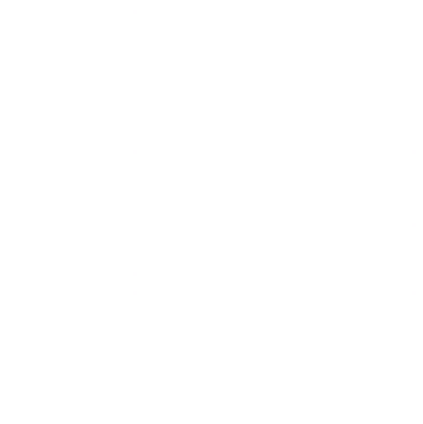

In [6]:
# Generate and display new airplane images
noise = np.random.normal(0, 1, (9, latent_dim))
generated_images = generator.predict(noise)

plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(generated_images[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


## Results and Conclusion
The GAN was trained on airplane images filtered from the CIFAR-10 dataset.
The generated images resemble real airplanes, demonstrating the potential of GANs for synthetic data generation.
GANs can be utilized to augment datasets, particularly when labeled data is limited.